# Generate some random data

# Linear regression
- Manual implementation
- Batch GD
- Stochastic GD
- Mini-batch GD

## Generating data points with some noise

(100, 1) 0.46360659509514174


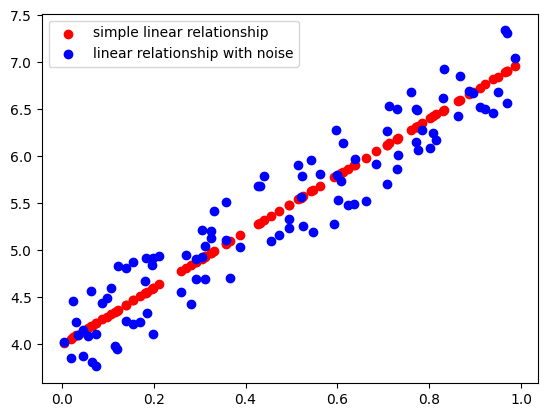

In [281]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = np.random.rand(m, 1)
print(X.shape, X.mean())

Y_naive = 3 * X + 4

# np.random.rand(m, 1) generates a random array with shape (m, 1) containing elements
# uniformly distributed between [0, 1)
Y = Y_naive + (np.random.rand(m, 1) - 0.5)

plt.scatter(X, Y_naive, c='red', label='simple linear relationship')
plt.scatter(X, Y, c='blue', label='linear relationship with noise')
plt.legend(loc="upper left")

plt.show()

## Training Linear Regression models

### Using batch GD

In [269]:
# np.random.seed(42)

epoch_cnt = 200
theta = np.random.rand(2, 1) # intercept, slope
alpha = 0.01 # Learning rate

# Add a new feature to X for bias term
X_b = np.array([(1, x[0]) for x in X]).T
print(X_b.shape)

grads = []
thetas = []
epochs = []

for e in range(epoch_cnt):
    y_hat = theta.T @ X_b
    grad = (2/m) * (y_hat - Y.T) @ X_b.T
    theta = theta - alpha * grad.T

    grads.append(grad)
    thetas.append(theta)
    epochs.append(e)

grads = np.array(grads)
thetas = np.array(thetas)
epochs = np.array(epochs)

(2, 100)


### Plotting parameters

In [270]:
from matplotlib.pyplot import figure

def plot_grads_vs_epochs(epochs, grads, figsize=(3, 3)):
    figure(figsize=figsize, dpi=80)
    plt.plot(epochs, grads[::, 0, 0], label='Theta 1 grad vs epochs', c='red') # Grad of theta_1 (intercept) vs epochs
    plt.plot(epochs, grads[::, 0, 1], label='Theta 2 grad vs epochs', c='blue') # Grad of theta_1 (slope) vs epochs
    plt.xlabel("Epochs")
    plt.ylabel("Gradient")
    plt.legend(loc="lower right")
    
    plt.show()

In [271]:
from matplotlib.pyplot import figure

def plot_thetas_vs_epochs(epochs, thetas, figsize=(3, 3)):
    figure(figsize=figsize, dpi=80)
    plt.plot(epochs, thetas[::, 0, 0], label='Theta 1 (intercept) vs epochs', c='red')
    plt.plot(epochs, thetas[::, 1, 0], label='Theta 2 (slope) vs epochs', c='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Theta')
    plt.legend(loc='lower right')
    
    plt.show()

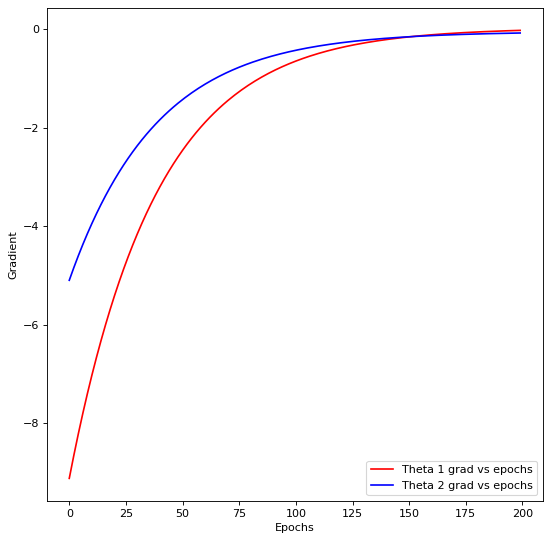

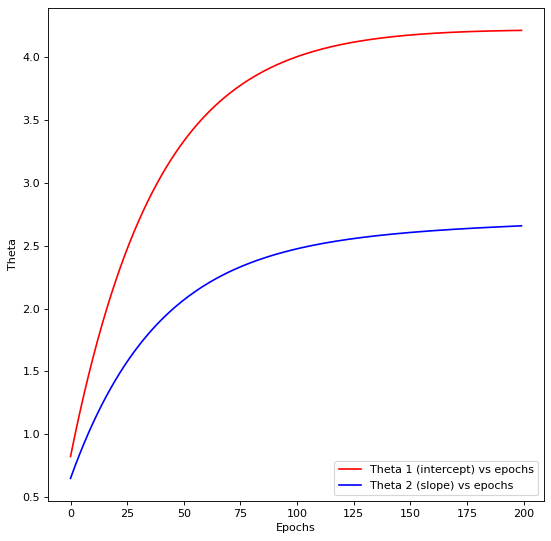

In [272]:
plot_grads_vs_epochs(epochs, grads, figsize=(8, 8))
plot_thetas_vs_epochs(epochs, thetas, figsize=(8, 8))

### Using Stochastic GD

In [289]:
import random

np.random.seed(42)

epoch_cnt = 1000
theta = np.random.rand(2, 1) # intercept, slope
alpha = 0.1 # Learning rate

# Add a new feature to X for bias term
X_b = np.array([(1, x[0]) for x in X]).T

grads = []
thetas = []
epochs = []

for e in range(epoch_cnt):
    ind = random.randint(0, m-1)
    x = X_b.T[ind].reshape(1, -1).T
    y = Y[ind].reshape(1, -1)

    y_hat = theta.T @ x
    grad = (2) * (y_hat - y.T) @ x.T
    theta = theta - alpha * grad.T

    if(e % 10 == 0):
        grads.append(grad)
        thetas.append(theta)
        epochs.append(e)

grads = np.array(grads)
thetas = np.array(thetas)
epochs = np.array(epochs)

theta

array([[4.02329161],
       [2.86033954]])

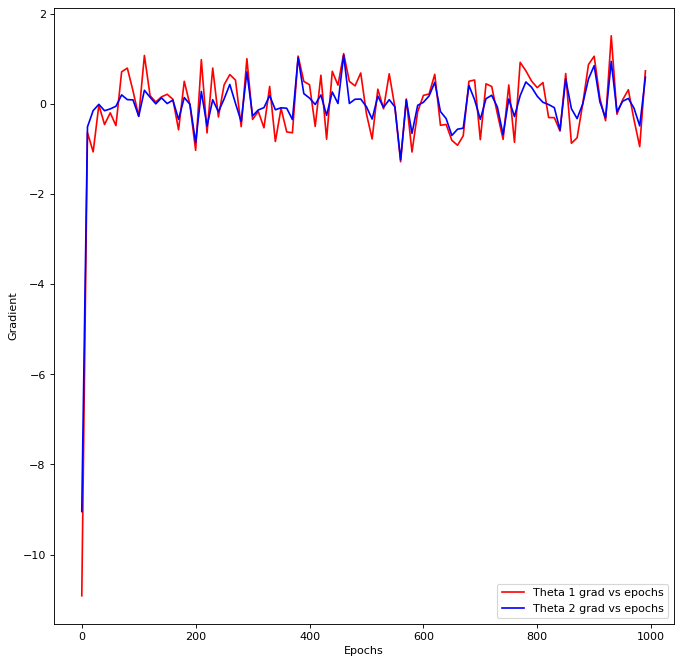

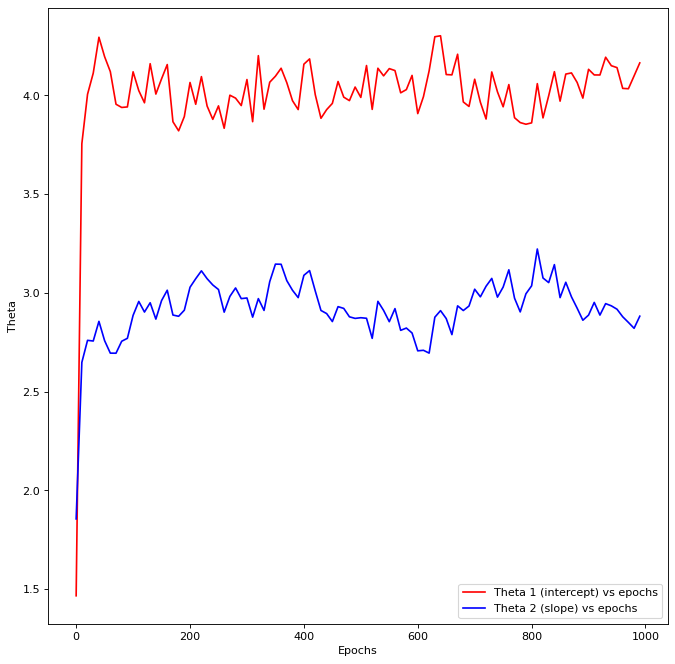

In [290]:
plot_grads_vs_epochs(epochs, grads, figsize=(10, 10))
plot_thetas_vs_epochs(epochs, thetas, figsize=(10, 10))

### Using mini-batch GD

In [353]:
import random

np.random.seed(42)

epoch_cnt = 1000
theta = np.random.rand(2, 1) # intercept, slope
alpha = 0.1 # Learning rate
batch_size = 4

# Add a new feature to X for bias term
X_b = np.array([(1, x[0]) for x in X]).T

grads = []
thetas = []
epochs = []

for e in range(epoch_cnt):
    ind = random.randint(batch_size // 2, m - max(1, batch_size // 2))
    
    low = ind-(batch_size // 2)
    hi = ind+(batch_size // 2)

    if(low == hi):
        low = ind
        hi = ind + 1
    
    x = X_b.T[low: hi].reshape(batch_size, -1).T
    y = Y[low: hi].reshape(batch_size, -1)

    y_hat = theta.T @ x
    grad = (2/batch_size) * (y_hat - y.T) @ x.T
    theta = theta - alpha * grad.T

    if(e % 5 == 0):
        grads.append(grad)
        thetas.append(theta)
        epochs.append(e)

grads = np.array(grads)
thetas = np.array(thetas)
epochs = np.array(epochs)

theta

array([[4.04813742],
       [2.98572661]])

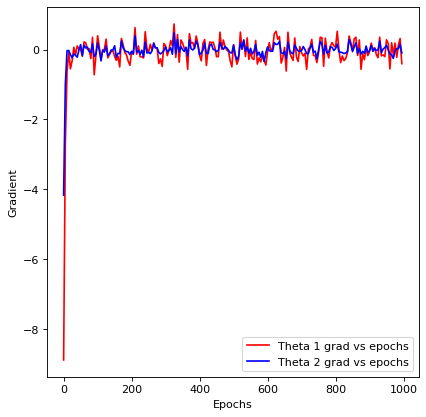

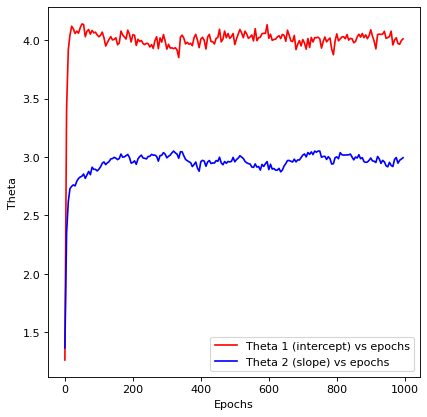

In [354]:
plot_grads_vs_epochs(epochs, grads, figsize=(6, 6))
plot_thetas_vs_epochs(epochs, thetas, figsize=(6, 6))

# Polynomial Regression

(100, 1)


[]

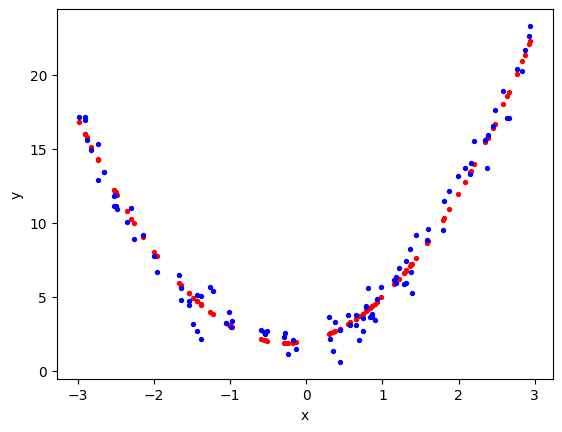

In [3]:
import numpy as np
import matplotlib.pyplot as plt


m = 100
X = 6 * np.random.rand(m, 1) - 3
Y_naive = 2 * X ** 2 + X + 2
Y = Y_naive + np.random.randn(m, 1)

print(X.shape)

plt.scatter(X, Y_naive, s=8, c='red')
plt.scatter(X, Y, s=8, c='blue')
plt.xlabel('x')
plt.ylabel('y')

plt.plot()

## Fitting polynomial regression to this data

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.29688576]
[-0.29688576  0.08814115]


In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)

LinearRegression()

In [6]:
lin_reg.intercept_, lin_reg.coef_

(array([1.93693769]), array([[1.06464181, 2.00888253]]))

# Regularization

In [22]:
import numpy as np
import matplotlib.pyplot as plt

m = 150
X = np.random.rand(m, 1)
print(X.shape, X.mean())

Y_naive = 3 * X + 4

# np.random.rand(m, 1) generates a random array with shape (m, 1) containing elements
# uniformly distributed between [0, 1)
Y = Y_naive + (np.random.rand(m, 1) - 0.5)

X_test = X[100:]
Y_test = Y[100:]

X = X[:100]
Y = Y[:100]

(150, 1) 0.4781244390647866


In [23]:
X.shape, Y.shape, X_test.shape, Y_test.shape

((100, 1), (100, 1), (50, 1), (50, 1))

In [61]:
from sklearn.linear_model import SGDRegressor

sgd_reg_l2 = SGDRegressor(
    penalty="l2",
    alpha=25 / (m - 50),
    tol=None,
    max_iter=100,
    eta0=0.01,
    random_state=42
)

sgd_reg_l2.fit(X, Y.ravel())

SGDRegressor(alpha=0.25, max_iter=100, random_state=42, tol=None)

In [62]:
from sklearn.linear_model import SGDRegressor

sgd_reg_l1 = SGDRegressor(
    penalty="l1",
    alpha=25 / (m - 50),
    tol=None,
    max_iter=100,
    eta0=0.01,
    random_state=42
)

sgd_reg_l1.fit(X, Y.ravel())

SGDRegressor(alpha=0.25, max_iter=100, penalty='l1', random_state=42, tol=None)

In [65]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    # alpha=25 / (m - 50),
    tol=None,
    max_iter=100,
    eta0=0.01,
    random_state=42
)

sgd_reg.fit(X, Y.ravel())

SGDRegressor(max_iter=100, random_state=42, tol=None)

## Plot graphs of test curves on all 3 models

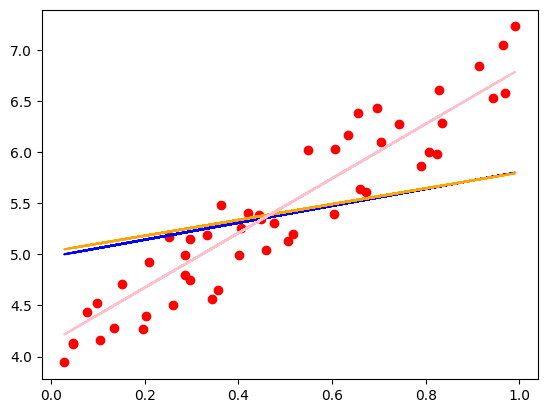

In [66]:
import matplotlib.pyplot as plt

Y_hat_l1 = sgd_reg_l1.predict(X_test)
Y_hat_l2 = sgd_reg_l2.predict(X_test)
Y_hat = sgd_reg.predict(X_test)


plt.scatter(X_test, Y_test, c='red')
plt.plot(X_test, Y_hat_l1, c='blue')
plt.plot(X_test, Y_hat_l2, c='orange')
plt.plot(X_test, Y_hat, c='pink')

plt.show()

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

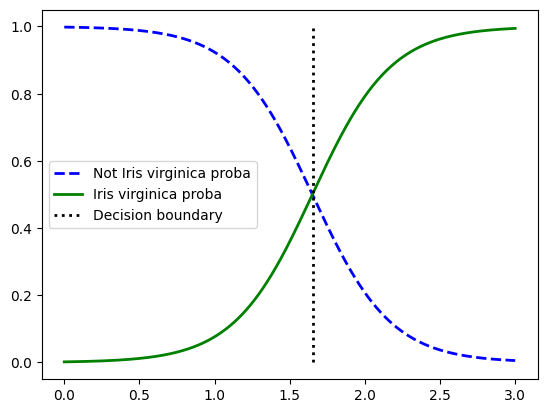

In [97]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
label="Decision boundary")
plt.legend(loc="best")
plt.show()

In [100]:
len(X_new[y_proba[:, 1] < 0.5])

550

In [102]:
len(X_new[y_proba[:, 1] >= 0.5])

450

In [104]:
X_new[y_proba[:, 1] >= 0.5][0, 0], X_new[y_proba[:, 1] < 0.5][-1, 0]

(np.float64(1.6516516516516517), np.float64(1.6486486486486487))